<a href="https://colab.research.google.com/github/SubhashGovindharaj/Faithful/blob/main/Yet_another_copy_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('faithful.csv')
df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


## Data cleaning

In [ ]:
#Clean
#missing values - No
#outliers - NO
#duplicates - yes, removed
#structured data  - yes
#correct format - yes

In [ ]:
df.isna().sum()

eruptions    0
waiting      0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(256, 2)

In [ ]:
df.dtypes

eruptions    float64
waiting        int64
dtype: object

In [ ]:
for column in df.columns:
  iqr: float = df[column].quantile(0.75) - df[column].quantile(0.25)

  upper_threshold: float = df[column].quantile(0.75) + (1.5*iqr)
  lower_threshold : float= df[column].quantile(0.25) - (1.5*iqr)
  df[column] = df[column].clip(lower_threshold,upper_threshold)


<ipython-input-39-e5303064bd7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower_threshold,upper_threshold)
<ipython-input-39-e5303064bd7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower_threshold,upper_threshold)


## EDA

<Axes: xlabel='waiting', ylabel='eruptions'>

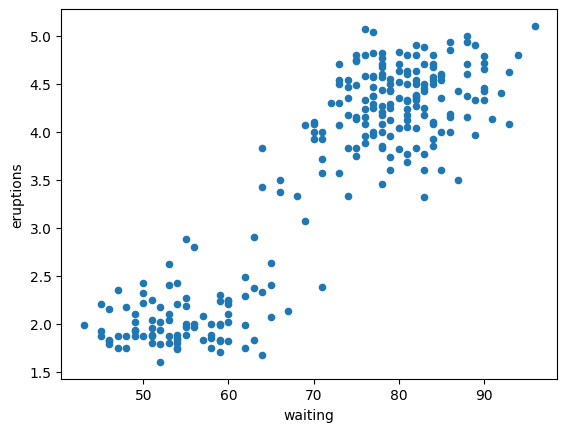

In [ ]:
df.plot.scatter(x='waiting',y='eruptions')

## Encode - No(Both my data are in continuos)

## Split - Not mandatory

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X=scaler.transform(df)

In [ ]:
X

array([[ 8.98507368e-02,  5.89639886e-01],
       [-1.50638720e+00, -1.26749361e+00],
       [-1.46924557e-01,  2.18213186e-01],
       [-1.07806335e+00, -6.73210894e-01],
       [ 9.17234065e-01,  1.03535193e+00],
       [-5.45984040e-01, -1.19320827e+00],
       [ 1.06532947e+00,  1.25820795e+00],
       [ 8.98507368e-02,  1.03535193e+00],
       [-1.37336737e+00, -1.49034963e+00],
       [ 7.54949876e-01,  1.03535193e+00],
       [-1.47712283e+00, -1.26749361e+00],
       [ 3.70965973e-01,  9.61066586e-01],
       [ 6.21930048e-01,  5.15354546e-01],
       [-1.55072714e+00, -1.78749099e+00],
       [ 1.06532947e+00,  8.86781246e-01],
       [-1.18093202e+00, -1.41606429e+00],
       [-1.55072714e+00, -6.73210894e-01],
       [ 1.15400936e+00,  9.61066586e-01],
       [-1.68374697e+00, -1.41606429e+00],
       [ 6.66269990e-01,  5.89639886e-01],
       [-1.50638720e+00, -1.49034963e+00],
       [-4.31690910e-02,  5.15354546e-01],
       [-3.82813051e-01, -1.53213514e-01],
       [ 9.

## Model

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =2)
model.fit(X)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
df['clusters'] = model.labels_



<ipython-input-44-ec2794e30281>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = model.labels_


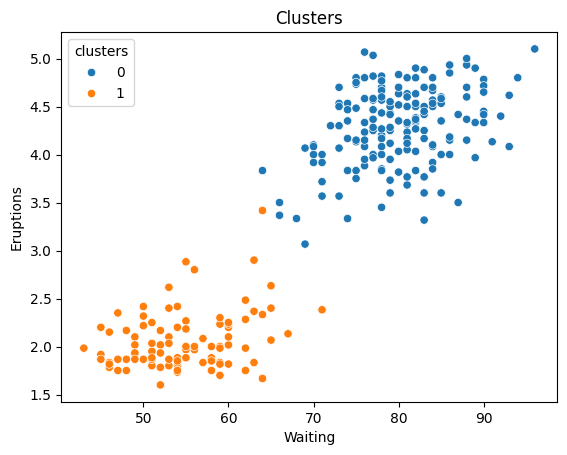

In [ ]:
import seaborn as sns
sns.scatterplot(x='waiting',y='eruptions',hue='clusters',data =df)
plt.title('Clusters')
plt.xlabel('Waiting')
plt.ylabel('Eruptions')
plt.show()

In [ ]:
model.inertia_

78.02178667251049

### model with k-3

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =3)
model.fit(X)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2], dtype=int32)

In [ ]:
df['clusters'] = model.labels_

<ipython-input-49-87ad903ed26e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = model.labels_


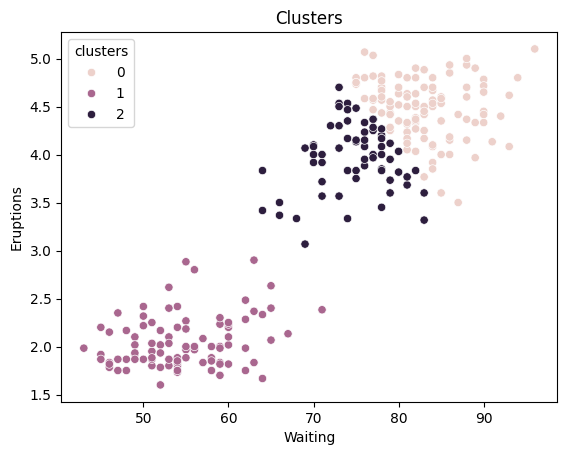

In [ ]:
import seaborn as sns
sns.scatterplot(x='waiting',y='eruptions',hue='clusters',data =df)
plt.title('Clusters')
plt.xlabel('Waiting')
plt.ylabel('Eruptions')
plt.show()

In [ ]:
model.inertia_

54.84820891481473

## Elbow plot

In [ ]:
inertias = []
for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(X)
  inertias.append(model.inertia_)

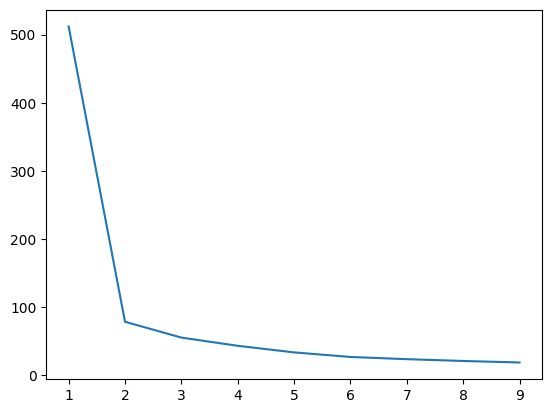

In [ ]:
plt.plot(range(1,10),inertias)

##Educational prespective

In [ ]:
for i in range(10):
  from sklearn.cluster import KMeans
  model = KMeans(n_clusters =3,random_state=(i*1000))
  model.fit(X)
  print(f'Inertia:{model.inertia_}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia:54.84820891481473
Inertia:54.77691892913094
Inertia:54.77691892913094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia:54.77691892913094
Inertia:54.84820891481473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia:54.84820891481473
Inertia:54.77691892913094
Inertia:54.84820891481473
Inertia:54.84820891481473
Inertia:54.78348147566475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
